In [1]:
%reload_ext tgpy
import tgpy as tg

In [2]:
df = tg.pd.read_pickle('../../../Datos/tierras_raras.pkl')
filtro = df.Region == 'ANTOFAGASTA'
#filtro = df.Region == 'VALPARAISO'


inputs = ['Coord. N', 'Coord. E']
#outputs = ['Pr(g/t)']
outputs = ['Y(g/t)']
#outputs = ['Nd(g/t)']
#outputs = ['Dy(g/t)']
#outputs = ['Yb(g/t)']

dt = tg.DataTensor(df[filtro][inputs + outputs], inputs=inputs, outputs=outputs)
n = dt.ndata

In [3]:
pobs = 0.8

nobs = int(pobs*n)
perm = tg.np.random.permutation(dt.index)
train = perm[:nobs]
valid = perm[nobs:]

train = dt.original_outputs(train).sort_values(by=dt.outputs).index.values
valid = dt.original_outputs(valid).sort_values(by=dt.outputs).index.values

In [4]:
dim = 100
prior = tg.TgPrior('prior', ['a', 'b', 'c', 'x', 'y'], dim=dim, low=-4, high=4, alpha=5, beta=3)

In [5]:
cov = tg.CovarianceTransport(None, noise=prior)
tgp = tg.TGP([cov], dt=dt)
tgp.obs(index=train)

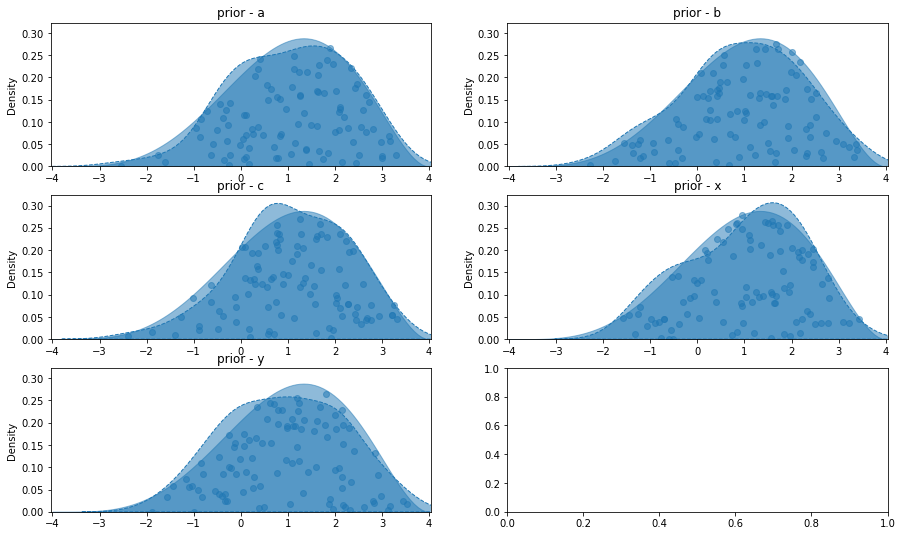

In [6]:
tgp.sample_priors()
tgp.plot_priors()

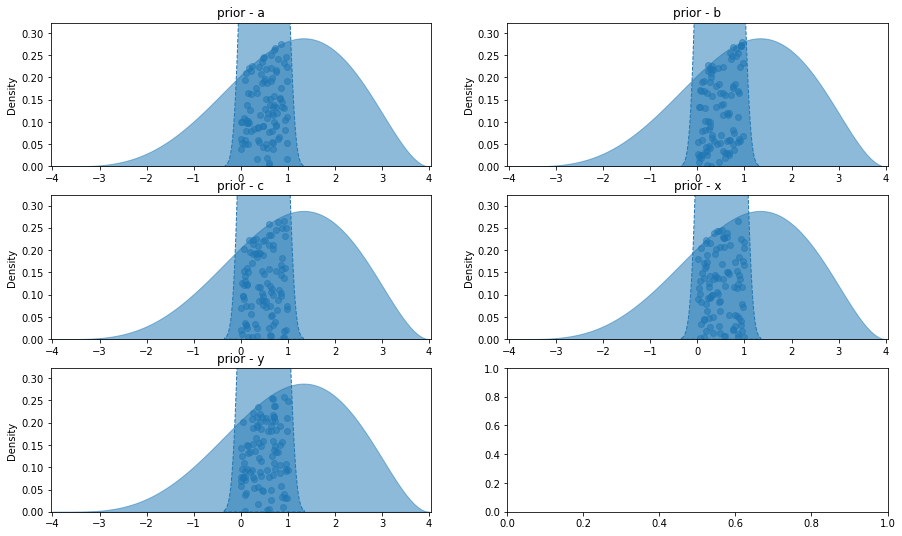

In [22]:
[p.data.uniform_() for p in tgp.parameters()]
tgp.plot_priors(kde=True)

In [23]:
learning = tg.TgLearning(tgp, lr=0.1, pbatch=0.8, rand_pert=0.0, pot=0, cycle=0.1)
tgp.logp()

tensor([-7.2107, -6.8756, -6.5964, -6.7757, -6.8226, -7.3033, -6.8513, -7.0750,
        -7.3145, -6.9217, -7.1838, -6.8120, -7.3294, -6.9918, -6.5980, -7.0223,
        -6.8039, -7.2463, -7.2037, -6.9354, -7.0492, -7.1714, -6.9588, -7.0255,
        -7.1070, -7.0321, -6.9017, -7.1166, -6.9857, -6.8732, -7.0505, -6.7371,
        -7.1843, -7.4699, -6.9511, -6.6316, -6.6508, -6.9445, -7.0343, -6.6371,
        -7.2159, -6.7773, -7.2100, -6.7559, -6.9579, -6.9693, -7.2536, -7.2032,
        -6.9486, -7.0660, -6.9199, -7.1045, -6.7059, -7.1742, -6.9900, -7.1206,
        -6.9452, -7.2254, -6.8788, -7.0622, -6.8736, -7.0414, -6.7099, -7.2627,
        -7.0831, -6.6142, -6.5411, -7.0846, -6.7537, -7.2976, -6.8636, -6.8570,
        -7.0219, -6.9958, -6.7038, -6.9765, -6.9937, -6.9015, -7.0773, -6.9399,
        -6.8782, -7.1163, -7.2645, -7.1982, -7.1936, -7.2511, -6.9068, -7.0942,
        -7.2142, -6.9419, -7.1391, -6.8964, -6.7860, -7.0156, -7.2304, -6.7921,
        -7.1155, -6.9633, -7.1044, -6.79

  0%|                                                                                                         …

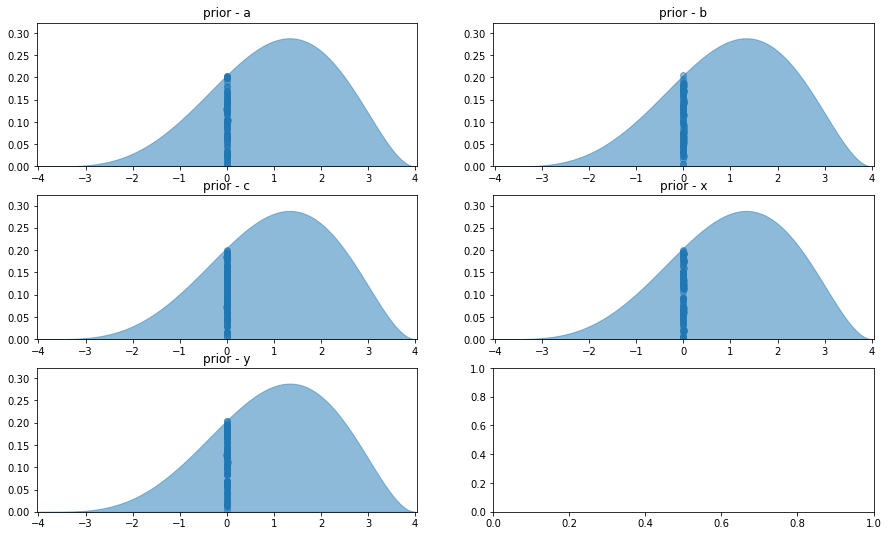

In [30]:
learning.execute_sgd(1000)
tgp.plot_priors(kde=False)

  0%|                                                                                                         …

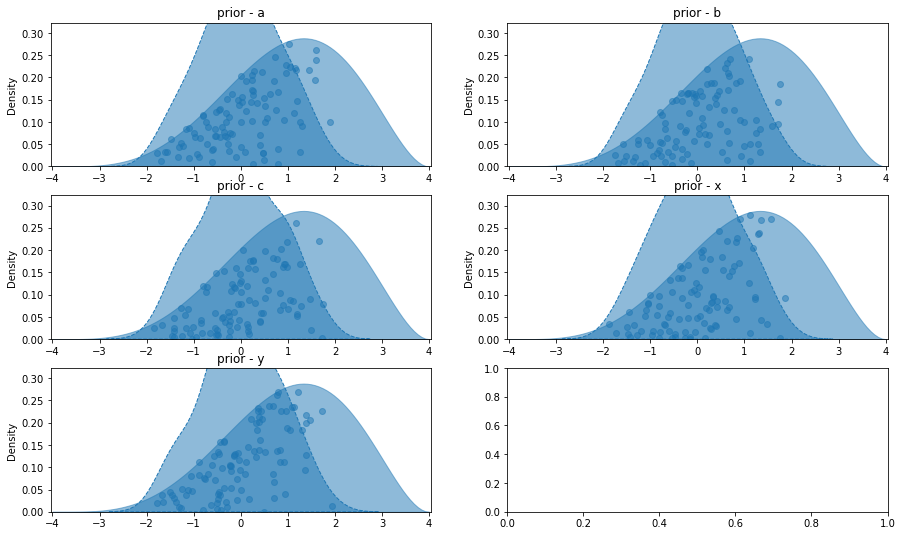

In [33]:
learning.execute_svgd(1000)
tgp.plot_priors(kde=True)